# Project 2 Team 7

### Diana Casanova, Renata Barreto, and Elizabeth Breen

Which U.S. counties should we prioritize to receive a diabetes intervention? 

To answer this question, we will analyze the data provided using Machine Learning techniques. Theoretically, these techniques will allow us to not only identify places with the greatest current burden of diabetes, but also to predict where the burden of diabetes will be highest in the future. Places with the greatest burden of diabetes may benefit the most from the diabetes intervention considered by policy makers.

First, we import our libraries and data:

#label sections and choose two more models 


## Setup

In [165]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

sns.set_style("darkgrid")

In [166]:
diabetes = pd.read_csv('Diabetes with Population Info by County 2017.csv') 

## Exploratory Data Analysis

Next, we take stock of the data: What does it look like? What format is it in? How large is it? What kinds of information is provided?

In [167]:
diabetes.columns

Index(['County', 'State', 'CountyFIPS', 'Diabetes_Number', 'Obesity_Number',
       'Physical_Inactivity_Number',
       'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       'race_total population', 'race_total population_one race',
       'race_total population_two or more races',
       'race_total population_one race_1',
       'race_total population_one race_white',
       'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native',
       'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
       'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
       'race_total population_one race_american indian and alaska native_navajo tribal grouping',
       'race_total population_one race_american indian and alaska native_sioux tribal grouping',
       'race_total population_one race_asian',
     

In [168]:
diabetes.shape

(3220, 95)

In [162]:
#remove county, state, count yfips, race total pop, race total pop one, race total pp two

In [169]:
columns_drop = ['County',
                'State',
                'CountyFIPS',
                'race_total population_one race', 
                'race_total population_two or more races',
                'race_total population_one race_1', 
                'race_total population_one race_american indian and alaska native_cherokee tribal grouping', 
                'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
                'race_total population_one race_american indian and alaska native_navajo tribal grouping',
                'race_total population_one race_american indian and alaska native_sioux tribal grouping',
                'race_total population_one race_asian_asian indian',
                'race_total population_one race_asian_chinese',
                'race_total population_one race_asian_filipino',
                'race_total population_one race_asian_japanese',
                'race_total population_one race_asian_korean',
                'race_total population_one race_asian_vietnamese',
                'race_total population_one race_asian_other asian',
                'race_total population_one race_native hawaiian and other pacific islander_native hawaiian',
                'race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro',
                'race_total population_one race_native hawaiian and other pacific islander_samoan',
                'race_total population_one race_native hawaiian and other pacific islander_other pacific islander',
                'race_total population_two or more races_1',
                'race_total population_two or more races_white and black or african american',
                'race_total population_two or more races_white and american indian and alaska native',
                'race_total population_two or more races_white and asian',
                'race_total population_two or more races_black or african american and american indian and alaska native',
                'race alone or in combination with one or more other races_total population',
                'race alone or in combination with one or more other races_total population_american indian and alaska native',
                'race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander',
                'race alone or in combination with one or more other races_total population_some other race',
                'hispanic or latino and race_total population_hispanic or latino (of any race)_mexican',
                'hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican',
                'hispanic or latino and race_total population_hispanic or latino (of any race)_cuban',
                'hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino',
                'hispanic or latino and race_total population_not hispanic or latino',
                'hispanic or latino and race_total population_not hispanic or latino_white alone',
                'hispanic or latino and race_total population_not hispanic or latino_black or african american alone',
                'hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone',
                'hispanic or latino and race_total population_not hispanic or latino_asian alone',
                'hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone',
                'hispanic or latino and race_total population_not hispanic or latino_some other race alone',
                'hispanic or latino and race_total population_not hispanic or latino_two or more races',
                'hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race',
                'hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -  and three or more races',
                'citizen -  voting age population_citizen -  18 and over population',
                'citizen -  voting age population_citizen -  18 and over population_male',
                'citizen -  voting age population_citizen -  18 and over population_female',
                'sex and age_total population',
                'sex and age_total population_sex ratio (males per 100 females)',
                'sex and age_total population_median age (years)',
                'sex and age_total population_under 18 years',
                'sex and age_total population_16 years and over',
                'sex and age_total population_21 years and over',
                'sex and age_total population_62 years and over',
                'sex and age_total population_65 years and over',
                'sex and age_total population_18 years and over_1',
                'sex and age_total population_18 years and over_sex ratio (males per 100 females)',
                'sex and age_total population_65 years and over_1',
                'sex and age_total population_65 years and over_male',
                'sex and age_total population_65 years and over_female', 'total housing units']


In [170]:
diabetes.drop(columns=columns_drop, inplace=True)

In [171]:
diabetes.shape

(3220, 34)

In [173]:
diabetes.describe()

,race_total population,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_some other race,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_asian,...,sex and age_total population_35 to 44 years,sex and age_total population_45 to 54 years,sex and age_total population_55 to 59 years,sex and age_total population_60 to 64 years,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over,sex and age_total population_18 years and over,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female
count,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,...,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03
mean,1.013323e+05,7.366104e+04,1.282022e+04,840.862422,5.460011e+03,181.062422,5.073669e+03,7.648562e+04,1.417189e+04,6.498339e+03,...,1.279126e+04,1.336499e+04,6779.211801,6176.720807,8973.608385,4566.194720,1950.632919,7.827602e+04,3.809320e+04,4.018282e+04
std,3.260964e+05,2.012548e+05,5.514027e+04,3534.196512,4.046557e+04,2006.671487,4.504728e+04,2.106528e+05,5.865741e+04,4.585803e+04,...,4.406811e+04,4.344438e+04,20607.787293,18207.408589,25310.494684,13124.332279,5987.738986,2.513513e+05,1.220023e+05,1.293948e+05
min,7.500000e+01,1.600000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,...,8.000000e+00,0.000000e+00,14.000000,9.000000,3.000000,3.000000,0.000000,7.100000e+01,3.600000e+01,3.100000e+01
25%,1.121425e+04,9.050250e+03,1.167500e+02,30.000000,3.200000e+01,0.000000,5.000000e+01,9.244750e+03,2.037500e+02,5.500000e+01,...,1.270750e+03,1.411500e+03,823.500000,788.000000,1201.750000,652.750000,250.000000,8.691500e+03,4.355250e+03,4.285250e+03
50%,2.595050e+04,2.161750e+04,8.380000e+02,114.000000,1.400000e+02,4.000000,2.505000e+02,2.233150e+04,1.148500e+03,2.090000e+02,...,3.057000e+03,3.404000e+03,1857.000000,1796.000000,2739.000000,1411.000000,544.500000,2.026050e+04,9.997500e+03,1.019050e+04
75%,6.655225e+04,5.711775e+04,5.591000e+03,425.250000,7.052500e+02,37.000000,1.177750e+03,5.879975e+04,6.405500e+03,1.028250e+03,...,7.900000e+03,8.785750e+03,4696.750000,4464.000000,6856.750000,3399.250000,1337.500000,5.200525e+04,2.557400e+04,2.664950e+04
max,1.009805e+07,5.186859e+06,1.230494e+06,82699.000000,1.469968e+06,93947.000000,2.121102e+06,5.498185e+06,1.281067e+06,1.636985e+06,...,1.387454e+06,1.369838e+06,631221.000000,547764.000000,734393.000000,384700.000000,180184.000000,7.851531e+06,3.827779e+06,4.023752e+06


In [174]:
diabetes.dtypes

Diabetes_Number                                                                                         object
Obesity_Number                                                                                          object
Physical_Inactivity_Number                                                                              object
sex and age_total population_65 years and over_sex ratio (males per 100 females)                        object
race_total population                                                                                    int64
race_total population_one race_white                                                                     int64
race_total population_one race_black or african american                                                 int64
race_total population_one race_american indian and alaska native                                         int64
race_total population_one race_asian                                                                     int64
r

## Data Preprocessing

In [175]:
diabetes.isnull().sum()

Diabetes_Number                                                                                         0
Obesity_Number                                                                                          0
Physical_Inactivity_Number                                                                              0
sex and age_total population_65 years and over_sex ratio (males per 100 females)                        0
race_total population                                                                                   0
race_total population_one race_white                                                                    0
race_total population_one race_black or african american                                                0
race_total population_one race_american indian and alaska native                                        0
race_total population_one race_asian                                                                    0
race_total population_one race_native hawaiian

In [176]:
# convert strings to numeric data types

diabetes = diabetes.apply(pd.to_numeric, errors = 'coerce')
diabetes.head()

# create proportions by sex

#create proportions by sex
diabetes['male_over_18']=diabetes['sex and age_total population_18 years and over_male']/diabetes['sex and age_total population_18 years and over']
diabetes['female_over_18']=diabetes['sex and age_total population_18 years and over_female']/diabetes['sex and age_total population_18 years and over']

Remove the County and State names from the data - already dropped above

In [155]:
#diabetes = diabetes.drop(['County', 'State'], axis = 1)
#diabetes.head()

In [178]:
diabetes_nomiss=diabetes.dropna() 

In [180]:
diabetes_nomiss.shape

(3112, 36)

In [181]:
diabetes_nomiss.dtypes

Diabetes_Number                                                                                         float64
Obesity_Number                                                                                          float64
Physical_Inactivity_Number                                                                              float64
sex and age_total population_65 years and over_sex ratio (males per 100 females)                        float64
race_total population                                                                                     int64
race_total population_one race_white                                                                      int64
race_total population_one race_black or african american                                                  int64
race_total population_one race_american indian and alaska native                                          int64
race_total population_one race_asian                                                                    

In [182]:
#we've already dropped this

#diabetes_rates = diabetes_nomiss.drop (["CountyFIPS", "race_total population"], axis = 1)

#we should've dropped total race bc of colinear with other columns but needed this to work
diabetes_rates = diabetes_nomiss.div(diabetes_nomiss['race_total population'], axis = "index")

#don't need this column - already dropped above 
#diabetes_rates['CountyFIPS'] = diabetes_nomiss['CountyFIPS'] #set as index not actual feautre 

#ideally, we should remove it from the dataset bc total pop is a perfect combo of 5-6 other columns bc of multi collinearlity
#diabetes_rates['race_total population'] = diabetes_nomiss['race_total population'] 




In [183]:
# reconstruct rates by sex

##not sure why we're doing this 
## it gets you the full number again 
diabetes_rates['male_18_adj'] = diabetes_rates['male_over_18']*diabetes['race_total population']
diabetes_rates['female_18_adj'] = diabetes_rates['female_over_18']*diabetes['race_total population']

In [184]:
diabetes_rates.shape

(3112, 38)

In [185]:
diabetes_rates.head()

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_asian,race_total population_one race_native hawaiian and other pacific islander,...,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over,sex and age_total population_18 years and over,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,male_over_18,female_over_18,male_18_adj,female_18_adj
0,0.093804,0.244366,0.226902,0.001386,1.0,0.768786,0.191395,0.002880,0.010290,0.000580,...,0.085344,0.045725,0.014764,0.757808,0.363297,0.394511,0.000009,0.000009,0.479405,0.520595
1,0.080281,0.233255,0.192324,0.000416,1.0,0.862662,0.094970,0.007314,0.008073,0.000043,...,0.117973,0.058456,0.018976,0.780512,0.375307,0.405205,0.000002,0.000002,0.480847,0.519153
2,0.131875,0.310643,0.210651,0.002956,1.0,0.473819,0.475758,0.002793,0.003724,0.000039,...,0.109379,0.053991,0.016368,0.789155,0.423668,0.365488,0.000021,0.000018,0.536862,0.463138
3,0.105251,0.290052,0.258667,0.003573,1.0,0.766547,0.222755,0.000355,0.001642,0.000000,...,0.094198,0.049363,0.018955,0.793182,0.425179,0.368003,0.000024,0.000021,0.536042,0.463958
4,0.108977,0.246804,0.249198,0.001383,1.0,0.955052,0.014954,0.002446,0.003435,0.000312,...,0.106375,0.056119,0.015023,0.766363,0.374621,0.391743,0.000008,0.000009,0.488829,0.511171


In [186]:
diabetes_rates.describe()

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_asian,race_total population_one race_native hawaiian and other pacific islander,...,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over,sex and age_total population_18 years and over,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,male_over_18,female_over_18,male_18_adj,female_18_adj
count,3112.000000,3112.000000,3112.000000,3112.000000,3112.0,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,...,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3.112000e+03,3112.000000,3112.000000
mean,0.092857,0.251666,0.200861,0.008463,1.0,0.831107,0.090215,0.019398,0.013749,0.000874,...,0.105167,0.055910,0.022501,0.776377,0.386060,0.390317,4.698359e-05,4.576699e-05,0.497027,0.502973
std,0.028097,0.044323,0.044511,0.022489,0.0,0.167534,0.144287,0.076536,0.027851,0.004176,...,0.025948,0.016874,0.009228,0.034813,0.031319,0.026195,1.061852e-04,9.812855e-05,0.028644,0.028644
min,0.019038,0.088946,0.064949,0.000008,1.0,0.038912,0.000000,0.000000,0.000000,0.000000,...,0.024984,0.006536,0.000000,0.595023,0.287995,0.174534,4.827863e-08,5.075037e-08,0.414418,0.194306
25%,0.072169,0.223436,0.170128,0.001186,1.0,0.767171,0.006815,0.001722,0.002954,0.000000,...,0.089679,0.045179,0.016359,0.758925,0.369051,0.380086,7.144686e-06,7.439118e-06,0.482462,0.497618
50%,0.089291,0.252390,0.199036,0.003179,1.0,0.896086,0.022927,0.003499,0.006104,0.000157,...,0.102301,0.054350,0.021085,0.776936,0.380786,0.393784,1.898416e-05,1.927036e-05,0.491329,0.508671
75%,0.110175,0.280113,0.231041,0.007626,1.0,0.950193,0.101805,0.008392,0.013225,0.000666,...,0.116763,0.064659,0.026899,0.797046,0.396571,0.405817,4.459395e-05,4.440287e-05,0.502382,0.517538
max,0.224208,0.476788,0.392285,0.595175,1.0,1.000000,0.874123,0.924799,0.425107,0.124457,...,0.339871,0.173555,0.085025,0.926842,0.723711,0.498580,2.389957e-03,1.996008e-03,0.805694,0.585582


## Visualization and Plotting

We created numerous plots to help us get a handle on the data, including histograms, box and whisker plots, and scatterplots. Because you asked us to limit ourselves to 3 for this final notebook, we are including the 3 plots that we thought were helpful to give us a grasp of the patterns between diabetes prevalence and race, age, and gender. 


### Proportion of Age Group in County vs Proportion of Diabetes in County 

True


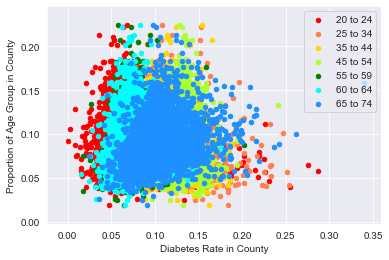

In [187]:

ax1 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_20 to 24 years', y='Diabetes_Number', color='r', label = "20 to 24")
ax2 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_25 to 34 years', y='Diabetes_Number', color='coral', label = "25 to 34", ax=ax1)
ax3 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_35 to 44 years', y='Diabetes_Number', color='gold', label = "35 to 44", ax=ax1)
ax4 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_45 to 54 years', y='Diabetes_Number', color='greenyellow', label = "45 to 54", ax=ax1)
ax5 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_55 to 59 years', y='Diabetes_Number', color='green', label = "55 to 59", ax=ax1)
ax6 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_60 to 64 years', y='Diabetes_Number', color='aqua', label = "60 to 64", ax=ax1)
ax7 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_65 to 74 years', y='Diabetes_Number', color='dodgerblue', label = "65 to 74", ax=ax1)

ax1.set_xlabel("Diabetes Rate in County")
ax1.set_ylabel("Proportion of Age Group in County")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6)  # True

This plot seems to show that counties with a higher proportion of older people tend to have higher rates of diabetes. Note that the age structure of the population isn't controlled for here.

We need to remove the following columns: 

'race_total population'
'sex and age_total population_18 years and over_male'
'sex and age_total population_18 years and over'
'sex and age_total population_18 years and over_female'


### Proportion of "Sex" in County vs Proportion of Diabetes in County 

True


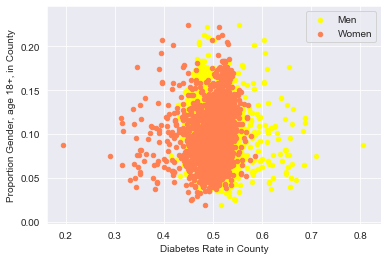

In [188]:
ax1 = diabetes_rates.plot(kind='scatter', y='Diabetes_Number', x='male_18_adj', color='yellow', label = "Men")
ax2 = diabetes_rates.plot(kind='scatter', y='Diabetes_Number', x='female_18_adj', color='coral', label = "Women", ax=ax1)


ax1.set_xlabel("Diabetes Rate in County")
ax1.set_ylabel("Proportion Gender, age 18+, in County")
print(ax1 == ax2 )  # True

### Proportion Race/Ethnic Group in County vs Proportion Diabetes in County 

In [189]:
diabetes_rates['race alone or in combination with one or more other races_total population_white']

0       0.785634
1       0.877861
2       0.483322
3       0.774493
4       0.971134
          ...   
3215    0.951198
3216    0.911401
3217    0.968994
3218    0.938000
3219    0.945634
Name: race alone or in combination with one or more other races_total population_white, Length: 3112, dtype: float64

True


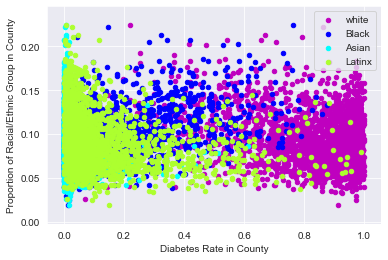

In [190]:
#these are the races that we should keep ?

#why is race alone for white? and for other races it includes checking multiple races?
#changed it to the same structure as the others
#hispanic isn't a race so that option makes sense
ax1 = diabetes_rates.plot(kind='scatter', x='race alone or in combination with one or more other races_total population_white', y='Diabetes_Number', color='m', label = "white")
ax2 = diabetes_rates.plot(kind='scatter', x='race alone or in combination with one or more other races_total population_black or african american', y='Diabetes_Number', color='blue', label = "Black", ax=ax1)
ax3 = diabetes_rates.plot(kind='scatter', x='race alone or in combination with one or more other races_total population_asian', y='Diabetes_Number', color='cyan', label = "Asian", ax=ax1)
ax4 = diabetes_rates.plot(kind='scatter', x='hispanic or latino and race_total population_hispanic or latino (of any race)', y='Diabetes_Number', color='greenyellow', label = "Latinx", ax=ax1)

ax1.set_xlabel("Diabetes Rate in County")
ax1.set_ylabel("Proportion of Racial/Ethnic Group in County")
print(ax1 == ax2 == ax3 == ax4)  # True

#missing explanations 
#barplots would've been better 
#few sentences about waht they say 

drop these columns next 

race alone or in combination with one or more other races_total population_black or african american
race alone or in combination with one or more other races_total population_white
race alone or in combination with one or more other races_total population_asian
hispanic or latino and race_total population_hispanic or latino (of any race)

## Covariance and Correlation

3.3. feature selection 

Because we ran out of plots to show you, we'd also like to show you how the features in the provided data are correlated. For instance, you'll see that inactivity, obesity, and diabetes are each correlated. 

In [191]:
diabetes_rates.cov(min_periods=1) #min number of observation per column to get rseults 

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_asian,race_total population_one race_native hawaiian and other pacific islander,...,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over,sex and age_total population_18 years and over,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,male_over_18,female_over_18,male_18_adj,female_18_adj
Diabetes_Number,7.894587e-04,6.844165e-04,7.392737e-04,-2.835695e-05,0.0,-0.001086,0.001498,1.816136e-05,-1.864998e-04,-7.437766e-06,...,1.883562e-04,1.058809e-04,1.268615e-06,1.540956e-04,2.894345e-05,1.251522e-04,-1.489305e-07,-1.561777e-07,-6.470222e-05,6.470222e-05
Obesity_Number,6.844165e-04,1.964511e-03,1.142120e-03,-9.512606e-05,0.0,-0.001323,0.002029,5.637231e-05,-3.022517e-04,-1.449781e-05,...,7.327433e-05,4.704555e-05,-7.638360e-06,1.079835e-04,6.888077e-05,3.910276e-05,-5.281766e-07,-5.786064e-07,1.345118e-05,-1.345118e-05
Physical_Inactivity_Number,7.392737e-04,1.142120e-03,1.981217e-03,2.350292e-05,0.0,-0.000824,0.001846,-1.777244e-04,-3.699211e-04,-1.687182e-05,...,2.615674e-04,1.993432e-04,2.144609e-05,2.173900e-04,1.122774e-04,1.051126e-04,9.302973e-08,3.963252e-08,-3.285167e-06,3.285167e-06
sex and age_total population_65 years and over_sex ratio (males per 100 females),-2.835695e-05,-9.512606e-05,2.350292e-05,5.057635e-04,0.0,0.000353,-0.000374,1.074261e-04,-6.262518e-05,-5.197177e-07,...,1.090890e-04,9.791496e-05,3.270173e-05,3.697522e-05,1.113556e-04,-7.438042e-05,2.300754e-06,2.033852e-06,1.170445e-04,-1.170445e-04
race_total population,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
race_total population_one race_white,-1.085836e-03,-1.322856e-03,-8.243745e-04,3.529057e-04,0.0,0.028068,-0.019329,-4.960198e-03,-1.305246e-03,-1.009701e-04,...,1.253041e-03,9.527707e-04,5.084615e-04,1.054876e-03,6.907689e-04,3.641076e-04,1.799693e-06,1.854214e-06,2.438734e-04,-2.438734e-04
race_total population_one race_black or african american,1.497837e-03,2.028668e-03,1.845767e-03,-3.738588e-04,0.0,-0.019329,0.020819,-1.151440e-03,8.086060e-05,-2.583036e-05,...,-5.203955e-04,-4.547629e-04,-2.772754e-04,7.810949e-05,-3.214772e-04,3.995867e-04,-1.814003e-06,-1.746011e-06,-5.038011e-04,5.038011e-04
race_total population_one race_american indian and alaska native,1.816136e-05,5.637231e-05,-1.777244e-04,1.074261e-04,0.0,-0.004960,-0.001151,5.857685e-03,-1.711280e-05,1.124171e-05,...,-2.574545e-04,-1.760400e-04,-1.039448e-04,-7.854713e-04,-2.624925e-04,-5.229788e-04,5.191184e-07,4.355835e-07,1.715344e-04,-1.715344e-04
race_total population_one race_asian,-1.864998e-04,-3.022517e-04,-3.699211e-04,-6.262518e-05,0.0,-0.001305,0.000081,-1.711280e-05,7.756516e-04,5.382023e-05,...,-1.943384e-04,-1.372659e-04,-4.127901e-05,3.574290e-06,-1.993733e-05,2.351162e-05,-3.523389e-07,-3.546629e-07,-2.754880e-05,2.754880e-05
race_total population_one race_native hawaiian and other pacific islander,-7.437766e-06,-1.449781e-05,-1.687182e-05,-5.197177e-07,0.0,-0.000101,-0.000026,1.124171e-05,5.382023e-05,1.743765e-05,...,-4.641606e-06,-5.773825e-06,-2.113963e-06,-3.671231e-06,2.449352e-06,-6.120583e-06,-7.194250e-09,-1.076499e-08,5.562825e-06,-5.562825e-06


In [192]:
#features correlated with each other we want to remove 
#features correlated with target we remove
#treshold for corr is > 0.7 
#cov is also -1 to 1 
#features that are highly covary with each other remove them
#-.7 and above and 0.7 and above 

In [193]:
diabetes_rates.corr(method='pearson', min_periods=1)

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_asian,race_total population_one race_native hawaiian and other pacific islander,...,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over,sex and age_total population_18 years and over,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,male_over_18,female_over_18,male_18_adj,female_18_adj
Diabetes_Number,1.000000,0.549577,0.591118,-0.044877,NaN,-0.230673,0.369464,0.008445,-0.238331,-0.063392,...,0.258353,0.223322,0.004893,0.157536,0.032891,0.170041,-0.049918,-0.056645,-0.080392,0.080392
Obesity_Number,0.549577,1.000000,0.578920,-0.095433,NaN,-0.178148,0.317216,0.016618,-0.244855,-0.078331,...,0.063712,0.062903,-0.018675,0.069982,0.049621,0.033679,-0.112225,-0.133033,0.010595,-0.010595
Physical_Inactivity_Number,0.591118,0.578920,1.000000,0.023479,NaN,-0.110549,0.287397,-0.052170,-0.298408,-0.090772,...,0.226473,0.265408,0.052212,0.140291,0.080542,0.090151,0.019683,0.009074,-0.002577,0.002577
sex and age_total population_65 years and over_sex ratio (males per 100 females),-0.044877,-0.095433,0.023479,1.000000,NaN,0.093666,-0.115214,0.062413,-0.099987,-0.005534,...,0.186942,0.258021,0.157574,0.047227,0.158101,-0.126260,0.963458,0.921617,0.181693,-0.181693
race_total population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race_total population_one race_white,-0.230673,-0.178148,-0.110549,0.093666,NaN,1.000000,-0.799629,-0.386841,-0.279741,-0.144326,...,0.288244,0.337026,0.328884,0.180865,0.131651,0.082967,0.101165,0.112788,0.050818,-0.050818
race_total population_one race_black or african american,0.369464,0.317216,0.287397,-0.115214,NaN,-0.799629,1.000000,-0.104268,0.020122,-0.042870,...,-0.138997,-0.186782,-0.208244,0.015550,-0.071140,0.105721,-0.118398,-0.123317,-0.121897,0.121897
race_total population_one race_american indian and alaska native,0.008445,0.016618,-0.052170,0.062413,NaN,-0.386841,-0.104268,1.000000,-0.008028,0.035174,...,-0.129639,-0.136310,-0.147173,-0.294797,-0.109509,-0.260856,0.063876,0.057998,0.078244,-0.078244
race_total population_one race_asian,-0.238331,-0.244855,-0.298408,-0.099987,NaN,-0.279741,0.020122,-0.008028,1.000000,0.462773,...,-0.268921,-0.292084,-0.160614,0.003686,-0.022857,0.032228,-0.119142,-0.129774,-0.034533,0.034533
race_total population_one race_native hawaiian and other pacific islander,-0.063392,-0.078331,-0.090772,-0.005534,NaN,-0.144326,-0.042870,0.035174,0.462773,1.000000,...,-0.042837,-0.081941,-0.054858,-0.025254,0.018728,-0.055954,-0.016225,-0.026271,0.046506,-0.046506


In [194]:
diabetes_rates.shape

(3112, 38)

## 3: Prepare to Fit Model

### 3.1: Data Cleaning

diabetes_normalize = diabetes_normalize.drop(['County', 'State'], axis = 1)
diabetes_normalize.head()

In [195]:
np.nanquantile(diabetes_rates['Diabetes_Number'], q=0.25)

#this seems weird we shouldn't do it 

0.07216936122629641

In [207]:
np.percentile(diabetes_rates['Diabetes_Number'], q=0.10)

0.02929342417130693

In [208]:
np.nanquantile(diabetes_rates['Diabetes_Number'], q=0.75)

diabetes_rates['diabetes_90th'] = np.where(diabetes_rates['Diabetes_Number'] > np.percentile(mydata_norm['Diabetes_Number'], q=0.75), 1, 0)
mydata_norm = mydata_norm.dropna(axis=0, how='any')



IndexError: invalid index to scalar variable.

### 3.2: Partition Data

#### Train/Test/Validation Split

In [209]:
X = diabetes_rates.drop(['Diabetes_Number',], axis = 1) #dropping vc predicting
y = diabetes_rates['Diabetes_Number'] #this is the thing we're predicting
X.head()

,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_some other race,...,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over,sex and age_total population_18 years and over,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,male_over_18,female_over_18,male_18_adj,female_18_adj
0,0.244366,0.226902,0.001386,1.0,0.768786,0.191395,0.002880,0.010290,0.000580,0.007409,...,0.085344,0.045725,0.014764,0.757808,0.363297,0.394511,0.000009,0.000009,0.479405,0.520595
1,0.233255,0.192324,0.000416,1.0,0.862662,0.094970,0.007314,0.008073,0.000043,0.009774,...,0.117973,0.058456,0.018976,0.780512,0.375307,0.405205,0.000002,0.000002,0.480847,0.519153
2,0.310643,0.210651,0.002956,1.0,0.473819,0.475758,0.002793,0.003724,0.000039,0.030176,...,0.109379,0.053991,0.016368,0.789155,0.423668,0.365488,0.000021,0.000018,0.536862,0.463138
3,0.290052,0.258667,0.003573,1.0,0.766547,0.222755,0.000355,0.001642,0.000000,0.000400,...,0.094198,0.049363,0.018955,0.793182,0.425179,0.368003,0.000024,0.000021,0.536042,0.463958
4,0.246804,0.249198,0.001383,1.0,0.955052,0.014954,0.002446,0.003435,0.000312,0.007581,...,0.106375,0.056119,0.015023,0.766363,0.374621,0.391743,0.000008,0.000009,0.488829,0.511171


In [210]:
from sklearn.model_selection import train_test_split 

# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)

#test / train 

In [211]:
print("Dimensions of Dataframe are", X.shape)

Dimensions of Dataframe are (3112, 37)


#### Validation Set

In [212]:
# split the data
# Returns 4 values: X_train, X_validate, y_train, y_validate

#validation is pre testing
#testing you just run once 

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

In [215]:
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)

Shape of X train is (1866, 37)
Shape of y_train is (1866,)
Shape of X_test is (623, 37)
Shape of y_test is (623,)


### 3.3: Feature Selection

In [216]:
print(X_train.columns)

#drop the columns based on the analysis in the features 
#talked about this drop things from dropping above 
#plots shuld be useful but they'r enot 

Index(['Obesity_Number', 'Physical_Inactivity_Number',
       'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       'race_total population', 'race_total population_one race_white',
       'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native',
       'race_total population_one race_asian',
       'race_total population_one race_native hawaiian and other pacific islander',
       'race_total population_one race_some other race',
       'race alone or in combination with one or more other races_total population_white',
       'race alone or in combination with one or more other races_total population_black or african american',
       'race alone or in combination with one or more other races_total population_asian',
       'hispanic or latino and race_total population',
       'hispanic or latino and race_total population_hispanic or latino (of any race)',
       'sex and 

## 4: Train Models

### 4.1: Model Description

A. Choose 5 different machine learning techniques. See available ones in the
scikit-learn documentation. 2.Detail the basic logic and assumptions underlying each model, its pros/cons,and why it is a plausible choice for this problem.
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. decision tree 
5. support vector reg 

B. Detail the basic logic and assumptions underlying each model, its pros/cons,and why it is a plausible choice for this problem.

#this needs to be done 



### 4.2 Train Models

#### Linear Regression Model 

In [217]:
# create a model
lin_reg = LinearRegression(normalize=True)

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

In [218]:
print(lin_model.coef_)
print(lin_model.intercept_)

[ 1.75518767e-01  1.80481511e-01 -1.16346173e-01 -4.65231148e+12
  1.18208853e-02 -3.75251443e-03  1.40497079e-01  3.57504992e-01
  8.95198359e-01  9.71604613e-02  8.19617197e-02  1.49610099e-01
 -3.03341560e-01  6.50294371e+11  5.51814461e-03  1.48648518e+13
  1.48648518e+13 -4.97068772e+11 -4.97068772e+11 -4.97068772e+11
 -4.97068772e+11 -4.97068772e+11 -4.97068772e+11 -4.97068772e+11
 -4.97068772e+11 -4.97068772e+11 -4.97068772e+11 -4.97068772e+11
 -4.97068772e+11 -4.97068772e+11  4.45663572e+12 -4.45663572e+12
 -4.45663572e+12  9.82702543e+01 -8.73580615e+01 -1.31268011e+13
 -1.31268011e+13]
2761035226282.59


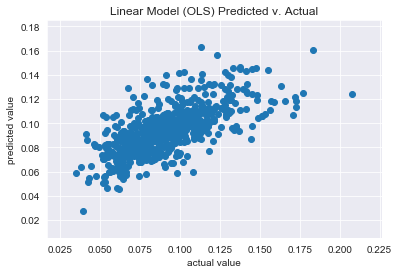

In [219]:
# predict the number of riders
lin_pred = lin_model.predict(X_validate)

# plot the residuals on a scatter plot
plt.scatter(y_validate, lin_pred)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [220]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

In [221]:
rmse(lin_pred, y_validate)

0.01949551103000989

#### Ridge Regression Model

In [222]:
# make and fit a Ridge regression model
ridge_reg = Ridge() 
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T
ridge_reg_data.columns = ['Coefficient', 'Feature']

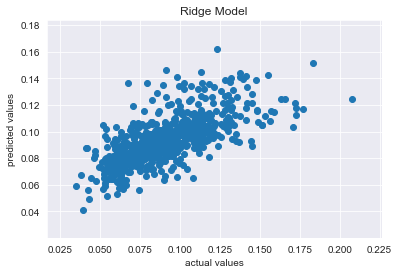

In [223]:
# use the model to make predictions
ridge_pred = ridge_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [224]:
# calculate the rmse for the Ridge model
rmse(ridge_pred, y_validate)

0.01938509750100278

#### Lasso Regression Model 

In [225]:
# create and fit the model
lasso_reg = Lasso(max_iter=10000) #initialize the model, add a hyperparameter 

lasso_model = lasso_reg.fit(X_train, y_train) #fit the model
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T #save it in this dataframe
lasso_reg_data.columns = ['Coefficient', 'Feature']

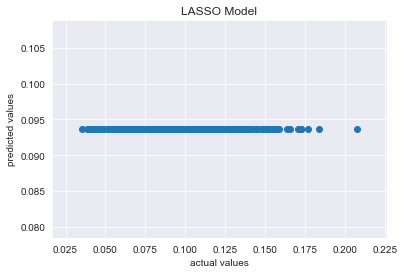

In [226]:
# use the model to make predictions
lasso_pred = lasso_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [227]:
# calculate the rmse for the LASSO model
rmse(lasso_pred, y_validate)

0.026105863098580435

#### Decision Tree

In [234]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()

#tree.DecisionTreeClassifier(criterion = 'gini',
                                           #splitter='best',
                                          # max_depth=None,
                                           #min_samples_split=2,
                                           #min_samples_leaf=1,
                                           #min_weight_fraction_leaf=0.0,
                                           #max_features=None,
                                           #max_leaf_nodes=None,
                                          # min_impurity_decrease=1e-07,
                                           #random_state = 10)

In [238]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [239]:
print(dt_regressor.score(X_train, y_train))

0.9999898578320823


In [240]:
print(dt_regressor.score(X_validate, y_validate))

-0.048018481056183004


#### Support Vector Machine 

In [251]:
from sklearn.svm import SVR

svr = SVR()
svr_model = svr.fit(X_train, y_train)



In [252]:
print(svr.score(X_validate, y_validate)) 

-1.2352222194887061


In [253]:
print(svr.score(X_train, y_train)) 

-0.8563755269745903


# Hyperparameter Tuning

#just do hyper tuning cells then see how each model did and if you 

#refining 
#say you do this and find there are coefficients close to 0
#you might drop those coefficients and retrain with fewer features bc adding complexity for no reason 
#variable importat plots - specific to decision tree, instead of reg coef you get variable importance

#test set and haven't done cross validation 
#pick one u like the best and do it on test set and record out 

## Linear Reg Model Hyperparameter Tuning

In [ ]:
#this does validation searching for hyper parameters 
param_grid = {'fit_intercept': ['True', 'False'],
              'normalize': ['True', 'False']}

lin_grid_reg = GridSearchCV(lin_reg, param_grid, cv=3, iid=False)
lin_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_validate)

print(lin_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lin_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lin_pred, y_validate))

## Ridge Hyperparameter Tuning

In [ ]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_grid_reg = GridSearchCV(ridge_reg, param_grid, cv=3, iid=False)
ridge_grid_reg.fit(X_train, y_train)

best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)

print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

## Lasso Hyperparameter

In [ ]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic', 'random']}

lasso_grid_reg = GridSearchCV(lasso_reg, param_grid, cv=3, iid=False)
lasso_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)

print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

## Decision Tree Hyperparameter Tuning 

## Support Vector Hyperparamter Tuning

In [257]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [258]:
svc_param_selection(X_train, y_train, 2)

/Users/renatabarreto/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/Users/renatabarreto/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/Users/renatabarreto/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/Users/renatabarreto/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_val

ValueError: Unknown label type: 'continuous'

# 5.1 Predict on Validation Set

this is the work done above in fitting models and testing 

# 5.2 Feature Selection 

this is hyperparameter tuning above

# 5.3 Test Set 

# 5.4 Cross Validation 

# 6 Discussion Questions

Policymakers, you included a few trenchant questions in your instructions, which we answer below:

#### 6.1 What is bias-variance tradeoff. Why is it relevant to machine learning problems like this one?

The bias-variance tradeoff refers to a difficulty we face in building statistical models. When models are made to fit very closely to the data, often using a lot of different features or variables in the process, this introduces a lot of variance, or flexibility of fit. The upside of high dimensionality models is that they are very accurate to the training data and they have little bias.  But because of their flexibility, high dimensionality models risk measuring noise in the data and mistaking it for signal. This problem is referred to as overfitting. 

Models with lower dimensionality tend to be less accurate and more rigid, or biased. Low dimension models are likelier than high dimension models to underfit data. When choosing an appropriate machine learning model, we must strike a balance between a model that is too biased/rigid and a model that is too noisy/flexible. This is the bias-variance tradeoff.

In traditional regression applications, scientists are often most interested in accurately and unbiasedly capturing any existing relationship in their data. But in machine learning, we are looking to predict future values of our outcome based on the body of data we’ve amassed. A model that hews too closely to the data on which it was trained is less likely to make accurate predictions. In machine learning, therefore, it’s vital that we strike the right balance between capturing variance and avoiding overfitting. 


#### 6.2 Define overfitting, and why it matters for machine learning. How can we address it?

Overfitting occurs when a model is so precisely matched to the training dataset that the model perceives variance in the sample as part of the underlying relationship between the independent and dependent variables. Overfitting is particularly problematic for machine learning applications, because a model that has been overfit (overfitted?) will try to predict future values of the dependent variable that match with the variance or noise in the training data. This means that overfit models will be less successful at prediction, and prediction is the whole point of machine learning. 

We can address overfitting through the use of regularizing techniques like Ridge regression and LASSO. These help us to avoid overfitting by shrinking or eliminating coefficients in our model with low values. This reduces the overall number of dimensions in the model, pushing the balance away from overfitting.

#### 6.3 Discuss your Analysis in 2-3 Paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as the race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application, why or why not?




A few caveats: Our predictions are made based on known (diagnosed) diabetes cases. However, in the United States today, many people are unable to access adequate medical care, including diabetes diagnosis and treatment. If diabetes is more common among populations with lesser access to medical care, this gives us greater reason to believe our measurement of diabetes prevalence is flawed.

The data provided do not tell us the demographics (age, gender, race, education, etc.) of the people who have been diagnosed with diabetes. This means that rather than directly capturing that, for instance, it is Asian women over age 70 with the highest prevalence of diabetes, we could only see that counties with a higher proportion of Asian women over age 70 also have a higher proportion of diabetes cases. We recommend analysis with data at a more granular level before spending billions of taxpayer dollars.
